# Capstone project for Carolina Jeanette Sanchez

![Course Hero](images/hero.png)

## Introduction

This Project aim to predict the month of more car accidents based on Mexico 2019 car accidents dataset 

## Data Set Selection

Mention the data set you selected for your capstone project, where did you find it, and why it was interesting to you
I selected the dataset "Incidentes viales 2019', it is available in Kaggle page ("https://www.kaggle.com/datasets/laloromero/mexico-road-accidents-during-2019" ), This data set contains accidents registered by the C4, a Mexican system that registers all traffic incidents.

## Data Examination

Let's start with the imports for the notebook.

Note: Remember to add in the `requirements.txt` file all the modules you use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Get the selected data set into a pandas Dataframe.

Note: You need to add the right method to load the data.

In [2]:
!ls -l *.csv

-rw-rw-r--  1 carolina.sanchez  staff  77811923 Aug 16 14:58 incidentes-viales-c5-2019.csv


In [3]:
#Reading Dataset into accidents variable()
accidents = pd.read_csv("incidentes-viales-c5-2019.csv")

In [4]:

#Getting the Number of records and columns
print("The shape of data is:",(accidents.shape))
#Printing a sample of 4 records
accidents.sample(3)

The shape of data is: (207634, 18)


,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
179358,C5/190701/04204,01/07/19,14:15:24,Lunes,(D) El incidente reportado se registró en dos ...,01/07/19,2019,Julio,16:23:13,MIGUEL HIDALGO,accidente-choque con lesionados,19.407330,-99.196460,URGENCIAS MEDICAS,LLAMADA DEL 911,MIGUEL HIDALGO,"19.40733,-99.19645992",7
71670,C5/190718/04419,18/07/19,15:18:16,Jueves,(A) La unidad de atención a emergencias fue de...,18/07/19,2019,Julio,18:17:05,IZTAPALAPA,accidente-choque sin lesionados,19.363110,-99.056770,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,"19.36311003,-99.05676984",7
31581,C5/190918/04267,18/09/2019,14:55:09,Miércoles,(N) La unidad de atención a emergencias fue de...,18/09/2019,2019,Septiembre,15:45:15,COYOACAN,accidente-choque sin lesionados,19.309446,-99.140856,EMERGENCIA,LLAMADA DEL 911,COYOACAN,"19.309446,-99.140856",9


In [5]:
#Understanding the characteristics of each column
accidents.describe()

,año_cierre,latitud,longitud,mes
count,207634.0,207634.000000,207634.000000,207634.000000
mean,2019.0,19.381333,-99.137500,6.236214
std,0.0,0.069064,0.061810,3.198820
min,2019.0,19.095427,-99.353508,1.000000
25%,2019.0,19.334780,-99.179970,3.000000
50%,2019.0,19.382550,-99.140620,6.000000
75%,2019.0,19.432220,-99.095920,9.000000
max,2019.0,19.578570,-98.945370,11.000000


<AxesSubplot:xlabel='incidente_c4'>

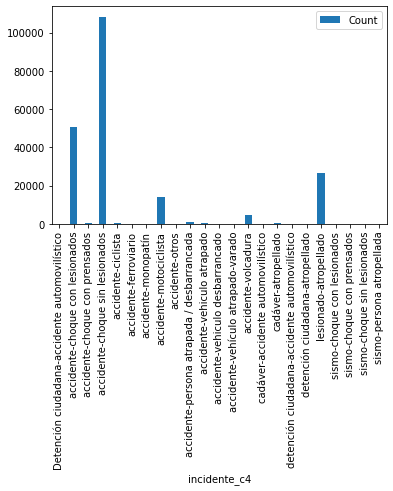

In [42]:
# Group the number of incidents by type (incidente_C4) 
accidents[["incidente_c4","mes"]].groupby("incidente_c4").count().rename(columns={"mes":"Count"}).plot(rot=90,kind="bar")

In [59]:
accidents[["delegacion_inicio","mes"]].groupby("delegacion_inicio").count().rename(columns={"mes":"Count"})

,Count
delegacion_inicio,
ALVARO OBREGON,15636
AZCAPOTZALCO,8844
BENITO JUAREZ,16294
COYOACAN,16536
CUAJIMALPA,4082
CUAUHTEMOC,20524
GUSTAVO A. MADERO,20298
IZTACALCO,8873
IZTAPALAPA,33235


Find relevant information about the selected dataset.

- How many rows and columns does it has?
- Which characteristics does each column has?
    - Data type
    - Minimum and maximum values
    - Values distribution
    - Missing data
- Which columns are related or are dependent on each other? 
    - Which ones can be derived?
    - Which are good candidates for an hypothesis?

Note: Use pandas methods as shape, head, sample, groupby, describe and any other you can think of!

In [56]:
#Selecting the accidents happening in Mondays and Fridays having a person hit by a car
Dia = ['Lunes', 'Viernes'] 
rslt_df = accidents.loc[(accidents["incidente_c4"] == 'lesionado-atropellado') & accidents["dia_semana"].isin(Dia)]  
rslt_df.sample(4)


,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
180112,C5/190705/03336,05/07/19,12:25:57,Viernes,(D) El incidente reportado se registró en dos ...,05/07/19,2019,Julio,12:30:53,MIGUEL HIDALGO,lesionado-atropellado,19.438314,-99.197275,URGENCIAS MEDICAS,LLAMADA DEL 911,MIGUEL HIDALGO,"19.438314,-99.197275",7
94255,C5/191111/01446,11/11/2019,07:29:56,Lunes,(A) La unidad de atención a emergencias fue de...,11/11/2019,2019,Noviembre,08:25:14,MIGUEL HIDALGO,lesionado-atropellado,19.454120,-99.189700,URGENCIAS MEDICAS,LLAMADA DEL 911,MIGUEL HIDALGO,"19.45412001,-99.18969984",11
46728,C5/190128/01926,28/01/2019,08:47:14,Lunes,(D) El incidente reportado se registró en dos ...,28/01/2019,2019,Enero,08:48:23,CUAUHTEMOC,lesionado-atropellado,19.407370,-99.142210,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,"19.40736996,-99.14221008",1
66659,C5/190607/01766,07/06/19,8:19:54,Viernes,(D) El incidente reportado se registró en dos ...,07/06/19,2019,Junio,8:25:04,ALVARO OBREGON,lesionado-atropellado,19.366420,-99.204860,URGENCIAS MEDICAS,LLAMADA DEL 911,ALVARO OBREGON,"19.36641996,-99.20486016",6


## Define the Hypothesis to test

Decide what is your project about.

What do you want to predict?

`Predict if there will be any hurinjured persone if I have been involved in a car incident July 2019 in IZTAPALAPA `

## Clean the data

Create a new Data Frame just with the data you are going to use

## Run your experiment(s)

Describe what your experiment is done, and execute it.

Note: Be generous with your plots!

## Reach a conclusion

What was the result of your experiment?

How can it be improved?

Elaborate in one thing you learn during the capstone project.

## Congratulations

You have finished the bootcamp!

![Congratulations](images/congratulations.jpg)